In [22]:
import numpy as np
import sys
if "../" not in sys.path:
    sys.path.append("../")
from lib.envs.blackjack import BlackjackEnv
from collections import defaultdict
from lib import plotting
import matplotlib
matplotlib.style.use('ggplot')

In [23]:
env = BlackjackEnv()

In [24]:
def sample_policy(state):
    # Sticks(0) if score >= 20 else Hits(1)
    score, dealer_score, usable_ace = state
    return 0 if score >= 20 else 1

In [26]:
def monte_carlo_prediction(policy, env, num_episodes, discount=1.0):
    v = defaultdict(float)
    state_returns = defaultdict(float)
    state_visits = defaultdict(float)
    
    for i in range(num_episodes):
        # generate an episode
        episode = []
        state = env.reset()
        for t in range(100):
            # max. time-steps in an episode = 100
            action = policy(state)
            next_state, reward, done, _ = env.step(action)
            episode.append((state, action, reward))
            if done:
                break
            state = next_state
        
        # MC Prediction
        state_set = set(t[0] for t in episode)
        for s in state_set:
            first_occurrence = next(i for i,v in enumerate(episode) if v[0]==s)
            state_returns[s] += sum(v[2]*(discount**i) for i,v in enumerate(episode[first_occurrence:]))
            state_visits[s] += 1.0
            v[s] = state_returns[s]/state_visits[s]
    return v

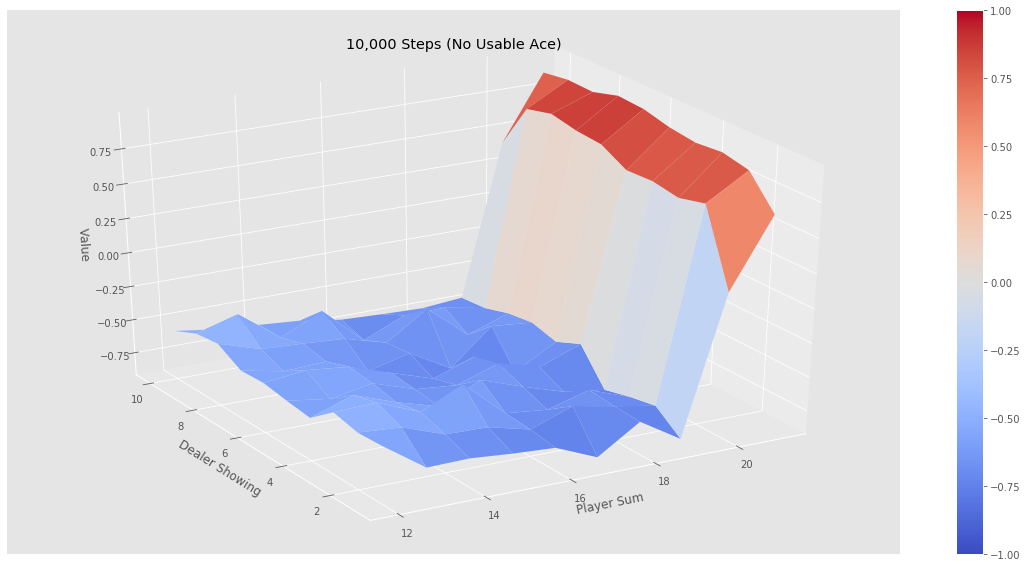

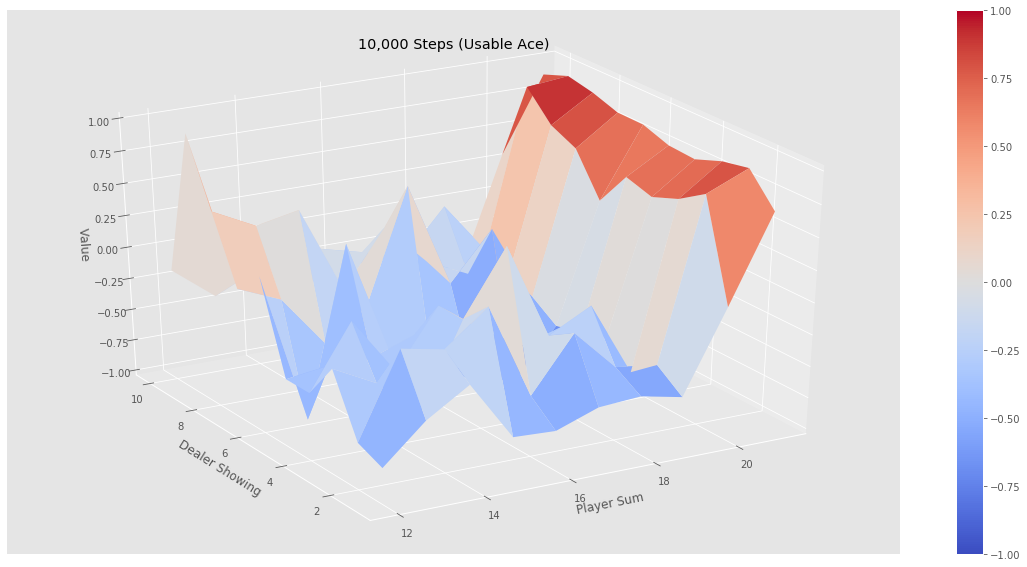

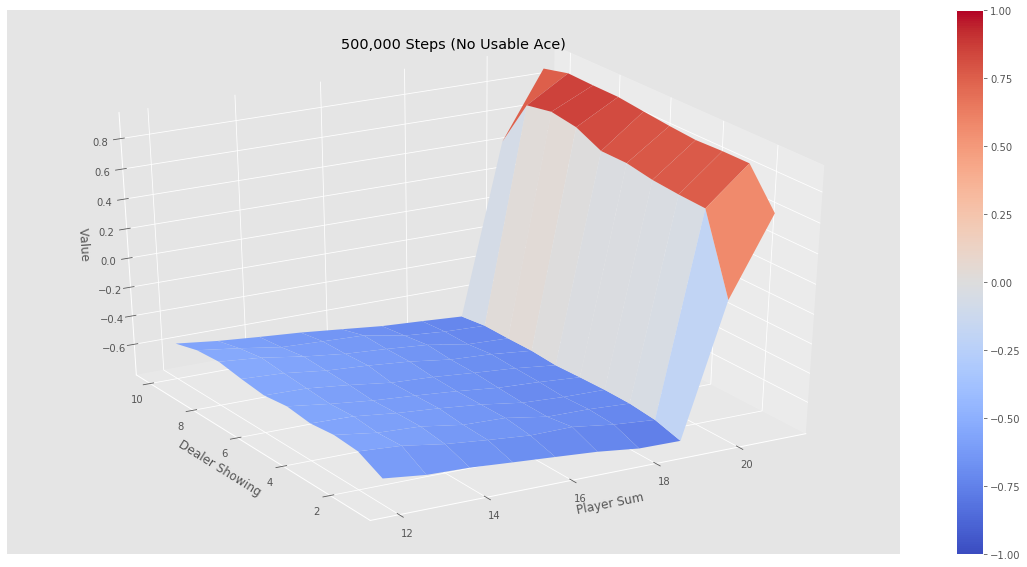

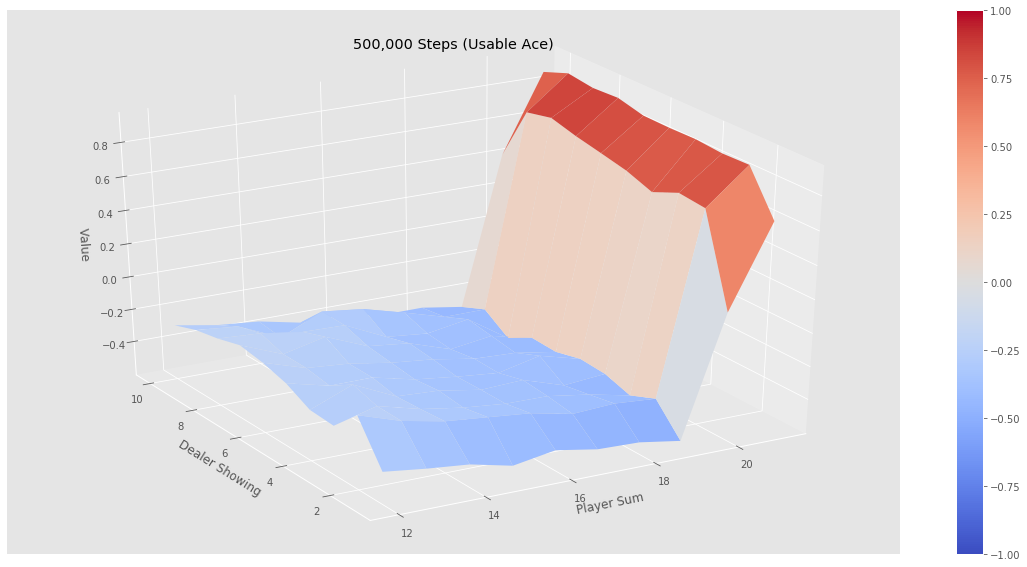

In [27]:
V_10k = monte_carlo_prediction(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(V_10k, title="10,000 Steps")

V_500k = monte_carlo_prediction(sample_policy, env, num_episodes=500000)
plotting.plot_value_function(V_500k, title="500,000 Steps")